First run in the terminal:

```shell
╰─  ./whamp  -file ../Models/H17f3b
# TOTAL PLASMA FREQ.:    8.98090 KHZ; SPEC 1 GYRO FREQ.:   0.00001 KHZ; SPEC 1 PLASMA FREQ.:    0.20953 KHZ; 
# SPECIES 1 parallel V_TH/C:   0.000103;  SPECIES 1 parallel BETA:   3.999683
# H+   DN= 1.00000E+06  T=  0.00500  D=1.00  A=0.49  B=0.00 VD= 0.00
# e-   DN= 1.00000E+06  T=  0.00000  D=1.00  A=1.00  B=0.00 VD= 0.00
#INPUT: 
  
p0z.6f1e-4
#OUTPUT: 

pzf
    0.0000000      0.6000000    2.4688253E-01  8.96E-02    

#INPUT: 
  
z.2,.9,.1
    0.0000000      0.2000000    2.0656351E-02  2.02E-02    
    0.0000000      0.3000000    4.8935979E-02  4.01E-02    
    0.0000000      0.4000000    9.8232505E-02  6.57E-02    
    0.0000000      0.5000000    1.6778669E-01  8.32E-02    
    0.0000000      0.6000000    2.4688252E-01  8.96E-02    
    0.0000000      0.7000000    3.3044283E-01  8.81E-02    
    0.0000000      0.8000000    4.1672102E-01  8.15E-02    
    0.0000000      0.9000000    5.0517181E-01  7.17E-02    
 ```



Data loaded successfully!
Shape: (8, 4)

Column names: ['p', 'z', 'omega_r', 'omega_i']


/var/folders/2p/tg_djgcj4yl2z0f8t_5b0y6m0000gq/T/ipykernel_22060/1192235867.py:19: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(filename, delim_whitespace=True, header=None)


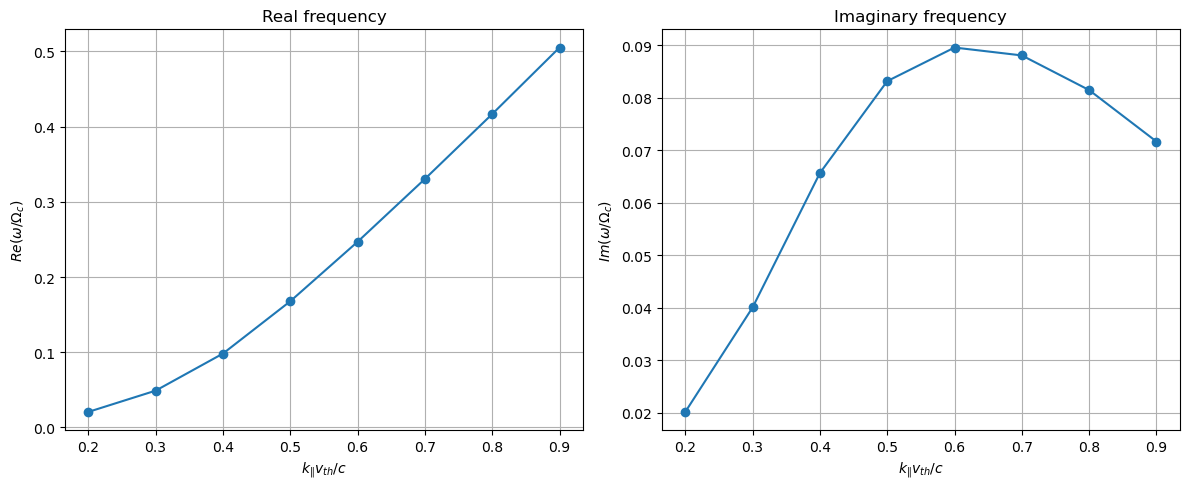


Maximum growth rate:
omega_i = 0.089600
At p = 0.000000, z = 0.600000
omega_r = 0.246883


In [22]:
# Cell 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cell 2: Read the text file into DataFrame
def read_whamp_data(filename):
    """
    Read WHAMP output data from text file into a pandas DataFrame.
    
    Parameters:
    filename: path to the text file
    
    Returns:
    DataFrame with columns: p, z, omega_r, omega_i
    """
    try:
        # Read the space-delimited data
        df = pd.read_csv(filename, delim_whitespace=True, header=None)
        
        # Assign column names
        df.columns = ['p', 'z', 'omega_r', 'omega_i']
        
        return df
        
    except Exception as e:
        print(f"Error reading file: {e}")
        return None

# Cell 3: Load your data
# Replace 'your_file.txt' with the actual path to your data file
filename = '/Users/u0167590/github/whamp/results/test1.txt'  # Adjust path as needed
df = read_whamp_data(filename)

# Display basic info about the data
if df is not None:
    print(f"Data loaded successfully!")
    print(f"Shape: {df.shape}")
    print(f"\nColumn names: {list(df.columns)}")
    #print(f"\nData types:")
    #print(df.dtypes)
    
# Cell 4: Display first few rows
#print("\nFirst 10 rows:")
#df.head(10)

# Cell 5: Basic statistics
#print("Basic statistics:")
#df.describe()

# Cell 6: Check for any data issues
#print("Data info:")
#print(f"Number of rows: {len(df)}")
#print(f"Number of columns: {len(df.columns)}")
#print(f"\nMissing values:")
#print(df.isnull().sum())
#print(f"\nUnique values in 'p' column: {df['p'].nunique()}")
#print(f"Unique values in 'z' column: {df['z'].nunique()}")

# Cell 7: Preview the data structure
#print("\nSample of data:")
#print(df.sample(5))  # Show 5 random rows

# Cell 8: Basic visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot omega_r vs z for different p values
# Flatten axes for flexible indexing
axes_flat = axes.flatten()

# Plot omega_r vs z
axes_flat[0].plot(df['z'], df['omega_r'], '-o')
axes_flat[0].set_xlabel(r'$k_\| v_{th} / c$')
axes_flat[0].set_ylabel(r'$Re (\omega/\Omega_{c})$')
axes_flat[0].set_title('Real frequency')
axes_flat[0].grid(True)

# Plot omega_i vs z (if more than 1 panel)
if len(axes_flat) > 1:
    axes_flat[1].plot(df['z'], df['omega_i'], '-o')
    axes_flat[1].set_xlabel(r'$k_\| v_{th} / c$')
    axes_flat[1].set_ylabel(r'$Im (\omega/\Omega_{c})$')
    axes_flat[1].set_title('Imaginary frequency')
    axes_flat[1].grid(True)

# Scatter plot of omega_r vs omega_i (if more than 2 panels)
#if len(axes_flat) > 2:
#    axes_flat[2].scatter(df['omega_r'], df['omega_i'], alpha=0.6, s=20)
#    axes_flat[2].set_xlabel('omega_r')
#    axes_flat[2].set_ylabel('omega_i')
#    axes_flat[2].set_title('Imaginary vs Real frequency')
#    axes_flat[2].grid(True)

# Histogram of omega_i values (if more than 3 panels)
#if len(axes_flat) > 3:
#    axes_flat[3].hist(df['omega_i'], bins=30, alpha=0.7, edgecolor='black')
#    axes_flat[3].set_xlabel('omega_i')
#    axes_flat[3].set_ylabel('Frequency')
#    axes_flat[3].set_title('Distribution of omega_i')
#    axes_flat[3].grid(True)

plt.tight_layout()
plt.show()

# Cell 9: Export to CSV (optional)
# Uncomment the line below if you want to save as CSV
# df.to_csv('whamp_data.csv', index=False)
# print("Data exported to whamp_data.csv")

# Cell 10: Advanced data exploration
#print("\nAdvanced data exploration:")

# Group by p values and show statistics
#print("\nStatistics grouped by p values:")
#grouped = df.groupby('p')[['omega_r', 'omega_i']].describe()
#print(grouped)

# Find maximum growth rate (most positive omega_i)
max_growth_idx = df['omega_i'].idxmax()
print(f"\nMaximum growth rate:")
print(f"omega_i = {df.loc[max_growth_idx, 'omega_i']:.6f}")
print(f"At p = {df.loc[max_growth_idx, 'p']:.6f}, z = {df.loc[max_growth_idx, 'z']:.6f}")
print(f"omega_r = {df.loc[max_growth_idx, 'omega_r']:.6f}")